In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [88]:
# Загрузка данных
earnings = pd.read_csv('data/coins-come.csv', 
                       parse_dates=['Дата'],
                       sep=';',
                       encoding='utf-8-sig')
purchases = pd.read_csv('data/coins-out.csv', 
                        parse_dates=['Дата оформления заказа'], 
                        sep=';',
                        encoding='utf-8-sig')
employees = pd.read_excel('data/personal-list.xlsx')

/var/folders/qf/xy929rcx1xnc19y51wt8zct00000gn/T/ipykernel_3344/2697367960.py:6: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  purchases = pd.read_csv('data/coins-out.csv',


In [41]:
employees

Внешний код                                Факт. департамент  \
0       SU181063             Департамент внутренней автоматизации   
1       SU198055  Департамент разработки программного обеспечения   
2       SU158012  Департамент инфраструктурных решений и сервисов   
3       SU196620                     Департамент телекоммуникаций   
4       SU160331  Департамент разработки программного обеспечения   
...          ...                                              ...   
3294      SU2674        Департамент продаж и менеджмента проектов   
3295    SU199667   Департамент инженерных и мультимедийных систем   
3296      SU2728                               Транспортный отдел   
3297      SU3864                                    Служба охраны   
3298    SU109788  Департамент разработки программного обеспечения   

                               Факт. подразделение  \
0                                              NaN   
1           Государственные информационные системы   
2           группа инженеров технической поддержки   
3                                              NaN   
4           Государственные информационные системы   
...                                            ...   
3294                                           NaN   
3295  Группа СКС и Автоматизации инженерных систем   
3296                                           NaN   
3297                                           NaN   
3298        Государственные информационные системы   

                                          Факт. группа  \
0             центральная служба технической поддержки   
1                           суды. группа разработчиков   
2                                                  NaN   
3              Группа поддержки продаж сетевых решений   
4                           суды. группа разработчиков   
...                                                ...   
3294                                     группа продаж   
3295                                               NaN   
3296                     Группа обслуживания и сервиса   
3297  Группа обеспечения контрольно-пропускного режима   
3298                      росстат.группа тестировщиков   

                            Факт. должность Является РМ/ТЛ  \
0             Инженер технической поддержки            нет   
1                       Инженер-разработчик            нет   
2     Старший инженер технической поддержки            нет   
3           Менеджер по работе с партнерами            нет   
4                       Инженер-разработчик            нет   
...                                     ...            ...   
3294       Директор по комплексным продажам            нет   
3295                                 Стажер            нет   
3296                               Водитель            нет   
3297                               Охранник            нет   
3298            Старший инженер-тестировщик            нет   

     Стаж фактический по компании      Пол  Возраст  
0             2 г., 9 мес.,12 дн.  Мужской       23  
1             0 г., 9 мес.,15 дн.  Женский       25  
2              3 г., 8 мес.,9 дн.  Мужской       34  
3             1 г., 5 мес.,10 дн.  Женский       29  
4             3 г., 7 мес.,10 дн.  Мужской       27  
...                           ...      ...      ...  
3294          17 г., 1 мес.,8 дн.  Мужской       38  
3295          0 г., 1 мес.,22 дн.  Женский       21  
3296         25 г., 4 мес.,24 дн.  Мужской       51  
3297         15 г., 9 мес.,24 дн.  Мужской       47  
3298           5 г., 9 мес.,4 дн.  Женский       29  

[3299 rows x 9 columns]

In [89]:

# --------------------------------------------
# 1. Анализ активности в миссиях
# --------------------------------------------

# Объединение данных с разными названиями ключевых столбцов
merged_earnings = pd.merge(
    earnings,
    employees,
    left_on='Код сотрудника',  # Столбец в earnings
    right_on='Внешний код',    # Соответствующий столбец в employees
    how='left'
)

# Проверка результатов
print("Столбцы после объединения:", merged_earnings.columns.tolist())
print("\nПример данных:")
print(merged_earnings[['Код сотрудника', 'Внешний код', 'Факт. подразделение']].head(3))


Столбцы после объединения: ['Код сотрудника', 'Департамент', 'Сумма вознаграждения', 'Название миссии', 'Контейнер', 'Дата', 'Комментарий', 'Внешний код', 'Факт. департамент', 'Факт. подразделение', 'Факт. группа', 'Факт. должность', 'Является РМ/ТЛ', 'Стаж фактический по компании', 'Пол', 'Возраст']

Пример данных:
  Код сотрудника Внешний код  \
0       SU147663    SU147663   
1        SU76490     SU76490   
2        SU69215     SU69215   

                                 Факт. подразделение  
0                                                NaN  
1                                                NaN  
2  группа инженеров по ИТ-инфраструктуре и монито...  


In [90]:
print("Столбцы в merged_earnings:", [col for col in merged_earnings.columns])

Столбцы в merged_earnings: ['Код сотрудника', 'Департамент', 'Сумма вознаграждения', 'Название миссии', 'Контейнер', 'Дата', 'Комментарий', 'Внешний код', 'Факт. департамент', 'Факт. подразделение', 'Факт. группа', 'Факт. должность', 'Является РМ/ТЛ', 'Стаж фактический по компании', 'Пол', 'Возраст']


Топ-5 департаментов по активности:
                                                    Сумма вознаграждения  \
Департамент                                                                
ДИРС.группа инженеров по вычислительной инфраст...              108270.0   
ДИРС.группа инженеров по инфраструктурному ПО                   102750.0   
ДИМС.Группа электроснабжения и климатических си...              100205.0   
ДБП.группа консультантов по финансам                            100070.0   
ДВА.центральная служба технической поддержки                     68290.0   

                                                    Код сотрудника  
Департамент                                                         
ДИРС.группа инженеров по вычислительной инфраст...              52  
ДИРС.группа инженеров по инфраструктурному ПО                   47  
ДИМС.Группа электроснабжения и климатических си...              44  
ДБП.группа консультантов по финансам                            71  
ДВА.центральная сл

Text(0.5, 1.0, 'Распределение заработка бобров по полу и роли')

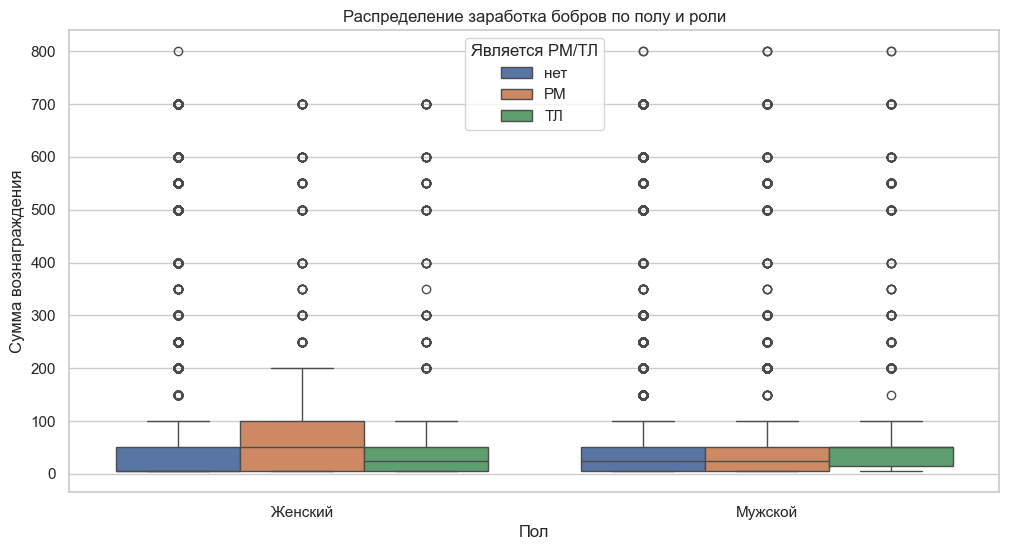

In [91]:
dept_activity = (
    merged_earnings.groupby('Департамент')
    .agg({'Сумма вознаграждения': 'sum', 'Код сотрудника': 'nunique'})
    .sort_values('Сумма вознаграждения', ascending=False)
    .head(5)
)
print("Топ-5 департаментов по активности:")
print(dept_activity)

plt.figure()

sns.boxplot(
    data=merged_earnings,
    x='Пол',
    y='Сумма вознаграждения',
    hue='Является РМ/ТЛ'
)

plt.title('Распределение заработка бобров по полу и роли')

In [92]:
purchases['fact_dep'] = purchases['Департамент'].str.split('.').str[0]

In [94]:
allowed_departments = [
    'ДРПО', 'ДИМС', 'ДБП', 'ДИРС', 'ДРП', 
    'ДТК', 'ФД', 'ДВА', 'ДПМП', 'ДМ', 'АЭД'
]

purchases1 = purchases[purchases['Департамент'].isin(allowed_departments)].copy()
purchases1

Дата оформления заказа Код сотрудника Департамент  \
555      2024-10-01 11:58:00       SU152466        ДИМС   
635      2024-09-30 17:46:00         SU1551        ДИМС   
651      2024-09-30 14:30:00          SU315         ДТК   
1239     2024-09-09 16:02:00       SU152466        ДИМС   
1240     2024-09-09 16:02:00       SU152466        ДИМС   
...                      ...            ...         ...   
37088    2019-10-17 08:49:00       SU100642         ДРП   
37144    2019-09-30 10:45:00          SU315         ДТК   
37156    2019-09-24 12:16:00       SU128869         ДРП   
37161    2019-09-23 15:42:00       SU100642         ДРП   
37165    2019-09-23 14:12:00        SU77866         ДРП   

                         Наименование товара  Стоимость в валюте  Скидка  \
555                          Футболка К2Тех                    0       0   
635                          Футболка К2Тех                    0       0   
651                          Футболка К2Тех                    0       0   
1239                               Пуф Крок                 3500       0   
1240                          Кресло офисное                6500       0   
...                                      ...                 ...     ...   
37088      Журнал "Harvard Bisiness Review"                 1500       0   
37144                                 Кресло                5000       0   
37156     Термокружки "CROC IT NOW" на выбор                 700       0   
37161     Термокружки "CROC IT NOW" на выбор                 700       0   
37165  Футболка CROC IT NOW с небольшим лого                 500       0   

       Количество               Категория Статус товара fact_dep  
555             1    Мерч и сувениры КРОК       закупка     ДИМС  
635             1    Мерч и сувениры КРОК       закупка     ДИМС  
651             1    Мерч и сувениры КРОК       закупка      ДТК  
1239            1            В стиле КРОК    закончился     ДИМС  
1240            1  Прокачай эффективность    закончился     ДИМС  
...           ...                     ...           ...      ...  
37088           1                  Сервис    закончился      ДРП  
37144           1  Прокачай эффективность    закончился      ДТК  
37156           1            В стиле КРОК    закончился      ДРП  
37161           1            В стиле КРОК    закончился      ДРП  
37165           1            В стиле КРОК    закончился      ДРП  

[314 rows x 10 columns]

In [95]:

# --------------------------------------------
# 2. Анализ покупок
# --------------------------------------------

# Самые популярные категории товаров
top_categories = (
    purchases1.groupby('Категория')
    .agg({'Количество': 'sum'})
    .sort_values('Количество', ascending=False)
    .head(5)
)
print("\nТоп-5 категорий товаров:")
print(top_categories)

# Траты по департаментам
dept_spending = (
    purchases1.groupby('Департамент')
    .apply(lambda x: (x['Стоимость в валюте'] * x['Количество']).sum())
    .sort_values(ascending=False)
)
print("\nТраты по департаментам:")
print(dept_spending)


Топ-5 категорий товаров:
                        Количество
Категория                         
Лучше вместе                   142
Сервис                          82
В стиле КРОК                    69
Мерч и сувениры КРОК            38
Прокачай эффективность          27

Траты по департаментам:
Департамент
ДМ      853205
ДИМС    116950
ДРП      54885
АЭД      23345
ДВА      20671
ДТК      11200
ФД        3800
dtype: int64


/var/folders/qf/xy929rcx1xnc19y51wt8zct00000gn/T/ipykernel_3344/2709361600.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Стоимость в валюте'] * x['Количество']).sum())


In [110]:
print("Тип данных в earnings:", earnings['Код сотрудника'].dtype)
print("Тип данных в employees:", employees['Внешний код'].dtype)

Тип данных в earnings: object
Тип данных в employees: object


In [109]:
# Если коды содержат буквы
earnings['Код сотрудника'] = earnings['Код сотрудника'].astype(str)
employees['Внешний код'] = employees['Внешний код'].astype(str)

In [87]:
print("Пример кодов из earnings:", earnings['Код сотрудника'].head(3).tolist())
print("Пример кодов из employees:", employees['Внешний код'].head(3).tolist())

Пример кодов из earnings: ['0        SU147663\n1         SU76490\n2         SU69215\n3          SU4528\n4        SU163517\n           ...   \n94877    SU190343\n94878     SU44113\n94879    SU173704\n94880     SU43534\n94881       SU570\nName: Код сотрудника, Length: 94882, dtype: object', '0        SU147663\n1         SU76490\n2         SU69215\n3          SU4528\n4        SU163517\n           ...   \n94877    SU190343\n94878     SU44113\n94879    SU173704\n94880     SU43534\n94881       SU570\nName: Код сотрудника, Length: 94882, dtype: object', '0        SU147663\n1         SU76490\n2         SU69215\n3          SU4528\n4        SU163517\n           ...   \n94877    SU190343\n94878     SU44113\n94879    SU173704\n94880     SU43534\n94881       SU570\nName: Код сотрудника, Length: 94882, dtype: object']
Пример кодов из employees: ['SU181063', 'SU198055', 'SU158012']


In [112]:

# --------------------------------------------
# 3. Анализ связи активности и покупок
# --------------------------------------------

# Объединение всех данных
# Явное указание ключей для каждого объединения
# 1. Объединяем earnings и employees
step1 = pd.merge(
    earnings,
    employees,
    left_on='Код сотрудника',
    right_on='Внешний код',
    how='left'
)

# 2. Переименовываем столбец для последующих объединений
step1 = step1.rename(columns={'Код сотрудника': 'Employee_ID'})

# 3. Объединяем с purchases
full_data = pd.merge(
    step1,
    purchases.groupby('Код сотрудника').agg({'Стоимость в валюте': 'sum'}),
    left_on='Employee_ID',
    right_on='Код сотрудника',
    how='left'
)

# 4. Проверяем результат
print("Столбцы в full_data:", full_data.columns.tolist())

Столбцы в full_data: ['Employee_ID', 'Департамент', 'Сумма вознаграждения', 'Название миссии', 'Контейнер', 'Дата', 'Комментарий', 'Внешний код', 'Факт. департамент', 'Факт. подразделение', 'Факт. группа', 'Факт. должность', 'Является РМ/ТЛ', 'Стаж фактический по компании', 'Пол', 'Возраст', 'Стоимость в валюте']


In [114]:
import re

def months(staj):
    match = re.findall(r'(\d+)', staj)
    if len(match) == 3:
        years, months, days = map(int, match)
        total_months = years * 12 + months + (days // 30)
        return total_months
    return None

full_data['months_total'] = full_data["Стаж фактический по компании"].apply(months)

full_data

TypeError: expected string or bytes-like object, got 'float'


Корреляция между заработком и тратами:
                      Сумма вознаграждения  Стоимость в валюте
Сумма вознаграждения              1.000000           -0.019421
Стоимость в валюте               -0.019421            1.000000


Text(0.5, 1.0, 'Зависимость трат от возраста и стажа')

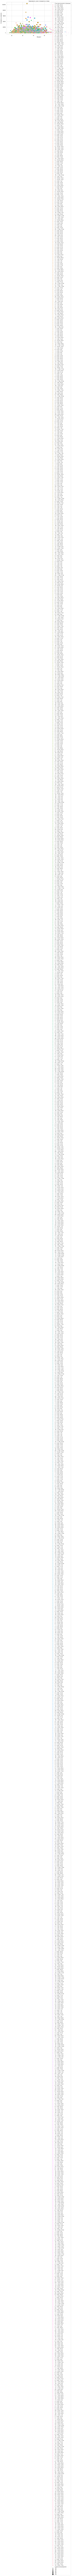

In [ ]:


# Корреляция между заработком и тратами
correlation = full_data[[
    'Сумма вознаграждения', 
    'Стоимость в валюте']].corr()
print("\nКорреляция между заработком и тратами:")
print(correlation)

# Визуализация трат по возрасту и стажу
plt.figure()
sns.scatterplot(
    data=full_data,
    x='Возраст',
    y='Стоимость в валюте',
    hue='months_total',
    size='Сумма вознаграждения',
    sizes=(20, 200)
)
plt.title('Зависимость трат от возраста и стажа')


In [120]:

# --------------------------------------------
# 4. Анализ эффективных товаров
# --------------------------------------------

# Товары с высокой конверсией (популярность среди активных сотрудников)
active_users = full_data[full_data['Сумма вознаграждения'] > full_data['Сумма вознаграждения'].median()]
top_items = (
    purchases[purchases['Код сотрудника'].isin(active_users['Код сотрудника'])]
    .groupby('Наименование товара')
    .agg({'Количество': 'sum'})
    .sort_values('Количество', ascending=False)
    .head(10)
)
print("\nТоп-10 товаров среди активных сотрудников:")
print(top_items)

plt.show()

KeyError: 'Код сотрудника'

In [119]:
purchases

Дата оформления заказа Код сотрудника  \
0        2024-10-15 17:16:00       SU162966   
1        2024-10-15 16:34:00       SU199359   
2        2024-10-15 16:31:00       SU180088   
3        2024-10-15 16:02:00       SU198080   
4        2024-10-15 15:56:00       SU198606   
...                      ...            ...   
37184    2019-09-23 07:16:00       SU116489   
37185    2019-09-22 16:14:00        SU69130   
37186    2019-09-22 16:11:00        SU69130   
37187    2019-09-22 16:10:00        SU69130   
37188    2019-09-22 16:09:00        SU69130   

                                         Департамент  \
0                                    ДРП.HR-партнеры   
1                                              Склад   
2                                      Отдел дизайна   
3                      ДИРС.группа пресейл-инженеров   
4      ДИРС.группа инженеров по инфраструктурному ПО   
...                                              ...   
37184   ДВА.центральная служба технической поддержки   
37185                                  Отдел дизайна   
37186                                  Отдел дизайна   
37187                                  Отдел дизайна   
37188                                  Отдел дизайна   

                        Наименование товара  Стоимость в валюте  Скидка  \
0                          Бобер-антистресс                 250       0   
1       Welcome-набор с чехлом и футболкой                    0       0   
2                        Олимпийка SOFT `24                   0     100   
3                           Побег из города                   0       0   
4                          Бобер-антистресс                 250       0   
...                                     ...                 ...     ...   
37184    Термокружки "CROC IT NOW" на выбор                 700       0   
37185                                 Фикус                1500       0   
37186    Термокружки "CROC IT NOW" на выбор                 700       0   
37187     Журнал "Harvard Bisiness Review"                  800       0   
37188     Журнал "Harvard Bisiness Review"                  800       0   

       Количество               Категория Статус товара       fact_dep  
0               1    Мерч и сувениры КРОК    закончился            ДРП  
1               1           Без категории    закончился          Склад  
2               1            В стиле КРОК    на витрине  Отдел дизайна  
3               1           Без категории    закончился           ДИРС  
4               1    Мерч и сувениры КРОК    закончился           ДИРС  
...           ...                     ...           ...            ...  
37184           1            В стиле КРОК    закончился            ДВА  
37185           1  Прокачай эффективность    закончился  Отдел дизайна  
37186           1            В стиле КРОК    закончился  Отдел дизайна  
37187           1                  Сервис    закончился  Отдел дизайна  
37188           1                  Сервис    закончился  Отдел дизайна  

[37189 rows x 10 columns]